In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv("dataset_ejemplo_40_3_16.csv",sep=";")
resultado=pd.Categorical(data["estado"])
data["S"]=resultado.codes
df=data[["S","e1","e4","e10"]]
df=df.head(40)

In [29]:
data["S"].head()

0    1
1    1
2    1
3    1
4    1
Name: S, dtype: int8

In [30]:
data["S"].head()

0    1
1    1
2    1
3    1
4    1
Name: S, dtype: int8

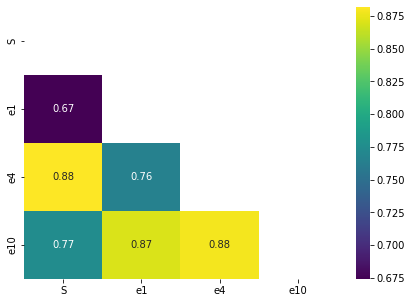

In [31]:
plt.figure(figsize=(7, 5))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [39]:
marginal_table_1 = pd.crosstab(index=df["e1"], 
                            columns=df["S"],
                             margins=True)
marginal_table_1

S,0,1,All
e1,,,
0,3,8,11
1,5,0,5
All,8,8,16


In [40]:
marginal_table_2 = pd.crosstab(index=df["e4"], 
                            columns=df["S"],
                             margins=True)
marginal_table_2

S,0,1,All
e4,,,
0,1,8,9
1,7,0,7
All,8,8,16


In [41]:
marginal_table_3 = pd.crosstab(index=df["e10"], 
                            columns=df["S"],
                             margins=True)
marginal_table_3

S,0,1,All
e10,,,
0,2,8,10
1,6,0,6
All,8,8,16


In [11]:
X=df[["e1","e4","e10"]]
Y=df[["S"]]

In [12]:
model = BernoulliNB()
clf = model.fit(X, Y)
Y_pred = model.predict(X)
print('Classes: ', clf.classes_)
print('Class Log Priors: ',clf.class_log_prior_)
score = model.score(X, Y)
print('Accuracy Score: ', score)
print(classification_report(Y, Y_pred))

Classes:  [0 1]
Class Log Priors:  [-0.69314718 -0.69314718]
Accuracy Score:  0.9375
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [21]:
Y["pred"]=Y_pred

/var/folders/vg/sjfbd8sn7sg74c92xs18vk8c0000gn/T/ipykernel_17462/1510227052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["pred"]=Y_pred


In [22]:
Y

,outcome,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,1


Matriz de Confusión:
[[7 1]
 [0 8]]


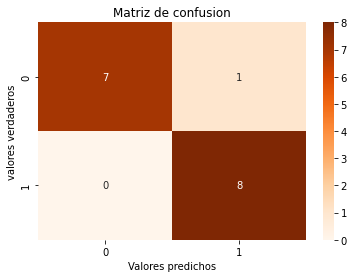

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

matriz = confusion_matrix(Y, Y_pred)
print('Matriz de Confusión:')
print(matriz)
ax= plt.subplot()
sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
ax.set_title('Matriz de confusion'); 

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf.predict_proba(X) 
probs = probs[:, 1]  
auc = roc_auc_score(Y, probs)  
print('AUC: %.4f' % auc) 

AUC: 0.9375


In [15]:
probs

array([0.96812749, 0.96812749, 0.96812749, 0.96812749, 0.96812749,
       0.96812749, 0.96812749, 0.96812749, 0.03862661, 0.96812749,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.45762712])